In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import seaborn as sns
import numpy as np

In [3]:
import matplotlib.pyplot as plt

sys.path.append('../experimental_sripts')

sys.path.append('/home/Container/tgnn/scripts/Models/BGNN_extended.py')

import pandas as pd
import json

from run import aggregate_results, get_name

Using backend: pytorch


In [4]:
path = '/home/Container/tgnn/scripts/experimental_sripts/results_refreshed/house/MGBDT/seed_results.json'
aggregate_results(path, task='regression')

{'MGBDT_gat_[6, 4, 4]': (0.5594443798065185, 0.01727966145118751),
 'MGBDT_gat_[6, 8, 8]': (0.5375211238861084, 0.004435128290443816),
 'MGBDT_gat_[6, 16, 16]': (0.5290044695138931, 0.0067019726733820156)}

In [5]:
path = '/home/Container/tgnn/scripts/experimental_sripts/results4/house/MGBDT/seed_results.json'
aggregate_results(path, task='regression')

{'MGBDT_gat_[6, 4, 1]': (0.5451093912124634, 0.038022744758518266),
 'MGBDT_gat_[6, 4]': (0.5172550559043885, 0.007313828704082356),
 'MGBDT_gat_[6, 4, 4]': (0.5331020712852478, 0.011310223760293758),
 'MGBDT_gat_[6, 8]': (0.5210984706878662, 0.006787997255005217),
 'MGBDT_gat_[6, 8, 8]': (0.5217310309410095, 0.004755033101858389)}

In [6]:
path = '/home/Container/tgnn/scripts/experimental_sripts/results_refreshed/house/MGBDT/MGBDT_norefresh_loss_test.json'
with open(path, 'r') as fp:
    loss_norefresh = np.array(json.load(fp))

In [7]:
path = '/home/Container/tgnn/scripts/experimental_sripts/results_refreshed/house/MGBDT/MGBDT_dim8_norefresh_loss.json'
with open(path, 'r') as fp:
    loss_norefresh_dim8 = np.array(json.load(fp))

In [8]:
path = '/home/Container/tgnn/scripts/experimental_sripts/results_refreshed/house/MGBDT/MGBDT_refresh_loss_test.json'
with open(path, 'r') as fp:
    loss_refresh = np.array(json.load(fp))

In [9]:
path = '/home/Container/tgnn/scripts/experimental_sripts/results_refreshed/house/MGBDT/MGBDT_dim8_refreshed_loss_.json'
with open(path, 'r') as fp:
    loss_refresh_dim8 = np.array(json.load(fp))

In [10]:
sns.set()

/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


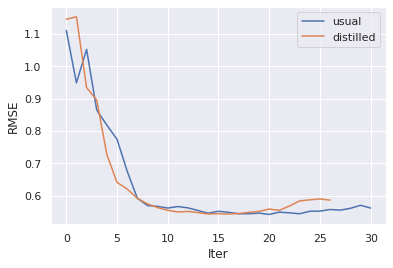

In [14]:
x = np.arange(len(loss_norefresh))
y = loss_norefresh[:,2]
sns.lineplot(x,y, label='usual')

x = np.arange(len(loss_refresh))
y = loss_refresh[:,2]
sns.lineplot(x,y, label='distilled')
plt.xlabel('Iter')
plt.ylabel('RMSE')
plt.savefig('/home/Container/pics/fresh_nofresh_loss.pdf', format='pdf', bbox_inches='tight')

/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


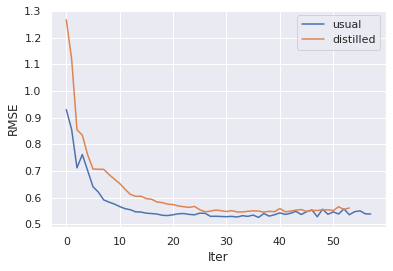

In [15]:
x = np.arange(len(loss_norefresh_dim8))
y = loss_norefresh_dim8[:,2]
sns.lineplot(x,y, label='usual')

x = np.arange(len(loss_refresh_dim8))
y = loss_refresh_dim8[:,2]
sns.lineplot(x,y, label='distilled')
plt.xlabel('Iter')
plt.ylabel('RMSE')
plt.savefig('/home/Container/pics/fresh_nofresh_loss_dim8.pdf', format='pdf', bbox_inches='tight')

In [16]:
time_norefresh = loss_norefresh[:,0]
time_refresh = loss_refresh[:,0]
time_norefresh_dim8 = loss_norefresh_dim8[:,0]
time_refresh_dim8 = loss_refresh_dim8[:,0]

In [17]:
time_norefresh = time_norefresh[1:] - time_norefresh[:-1]
time_refresh = time_refresh[1:] - time_refresh[:-1]
time_norefresh_dim8 = time_norefresh_dim8[1:] - time_norefresh_dim8[:-1]
time_refresh_dim8 = time_refresh_dim8[1:] - time_refresh_dim8[:-1]

/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


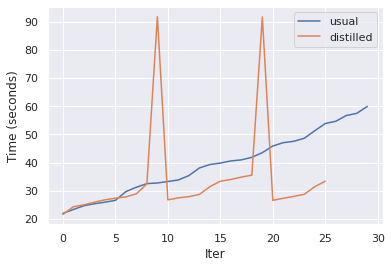

In [18]:
x = np.arange(len(time_norefresh))
y = time_norefresh
sns.lineplot(x,y, label='usual')

x = np.arange(len(time_refresh))
y = time_refresh
sns.lineplot(x,y, label='distilled')
plt.xlabel('Iter')
plt.ylabel('Time (seconds)')
plt.savefig('/home/Container/pics/fresh_nofresh_time.pdf', format='pdf', bbox_inches='tight')

/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/Container/envs/bgnn_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


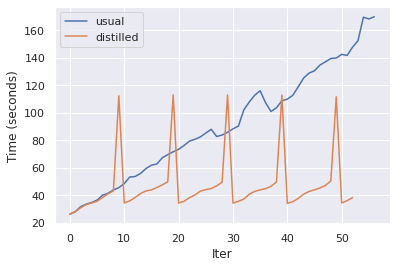

In [19]:
x = np.arange(len(time_norefresh_dim8))
y = time_norefresh_dim8
sns.lineplot(x,y, label='usual')

x = np.arange(len(time_refresh_dim8))
y = time_refresh_dim8
sns.lineplot(x,y, label='distilled')
plt.xlabel('Iter')
plt.ylabel('Time (seconds)')
plt.savefig('/home/Container/pics/fresh_nofresh_time_dim8.pdf', format='pdf', bbox_inches='tight')